In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn


In [76]:
from google.colab import drive

drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [77]:
import csv
df= pd.read_csv('gdrive/My Drive/Colab Notebooks/bbs_cust_base_scfy_20200210.csv')

In [78]:
df.describe()
df.shape

(510125, 19)

In [79]:
df.head(5)

,image,newacct_no,line_stat,bill_cycl,serv_type,serv_code,tenure,effc_strt_date,effc_end_date,contract_month,ce_expiry,secured_revenue,bandwidth,term_reas_code,term_reas_desc,complaint_cnt,with_phone_service,churn,current_mth_churn
0,201801,70068143.001.000000062,AC,1,BBS,VS100DUN,202,06.03.2018 00:00:00,05.03.2021 00:00:00,36.0,13.0,178.0,100M,NaN,NaN,0,N,N,N
1,201801,70068143.003.000072630,AC,1,BBS,VS030F6R,35,01.03.2019 00:00:00,28.02.2021 00:00:00,24.0,13.0,1572.0,30M,NaN,NaN,0,N,N,N
2,201801,70071840.001.000000066,AC,1,BBS,EAXMXMFSRN1,202,01.10.2019 00:00:00,30.09.2021 00:00:00,24.0,20.0,290.0,10M,NaN,NaN,0,Y,N,N
3,201801,70071840.003.000060034,AC,1,BBS,VS100DUN,72,07.11.2018 00:00:00,06.11.2020 00:00:00,24.0,9.0,218.0,100M,NaN,NaN,0,Y,N,N
4,201801,70076500.001.000000073,AC,1,BBS,PF100FSR,202,01.05.2017 00:00:00,30.04.2019 00:00:00,24.0,-9.0,430.0,100M (FTTO),NaN,NaN,0,N,Y,N


In [80]:
np.all("M" not in df['bandwidth'])

True

Text(0.5, 0, 'Churned Yes/No')

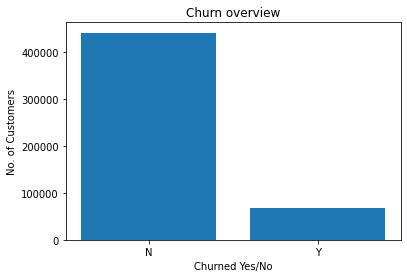

In [81]:
# overview of churn in existing data
y = df["churn"].value_counts()
plt.bar(y.index, y.values)
plt.title("Churn overview")
plt.ylabel("No. of Customers")
plt.xlabel("Churned Yes/No")

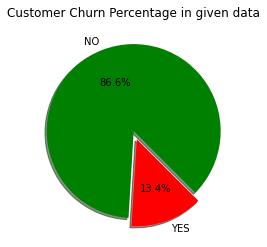

In [82]:
sizes = df['churn'].value_counts(sort = True)
colors = ["green","red"] 
status = ['NO', 'YES']
plt.pie(sizes, explode=(0,0.1), labels=(status), colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=315,)
plt.title('Customer Churn Percentage in given data')
plt.show()

In [83]:
dfshort = df[['tenure', 'effc_strt_date', 'effc_end_date', 'contract_month', 'ce_expiry', 'secured_revenue', 'bandwidth', 'complaint_cnt', 'with_phone_service', 'churn', 'current_mth_churn']]

In [84]:
dfshort.head()

,tenure,effc_strt_date,effc_end_date,contract_month,ce_expiry,secured_revenue,bandwidth,complaint_cnt,with_phone_service,churn,current_mth_churn
0,202,06.03.2018 00:00:00,05.03.2021 00:00:00,36.0,13.0,178.0,100M,0,N,N,N
1,35,01.03.2019 00:00:00,28.02.2021 00:00:00,24.0,13.0,1572.0,30M,0,N,N,N
2,202,01.10.2019 00:00:00,30.09.2021 00:00:00,24.0,20.0,290.0,10M,0,Y,N,N
3,72,07.11.2018 00:00:00,06.11.2020 00:00:00,24.0,9.0,218.0,100M,0,Y,N,N
4,202,01.05.2017 00:00:00,30.04.2019 00:00:00,24.0,-9.0,430.0,100M (FTTO),0,N,Y,N


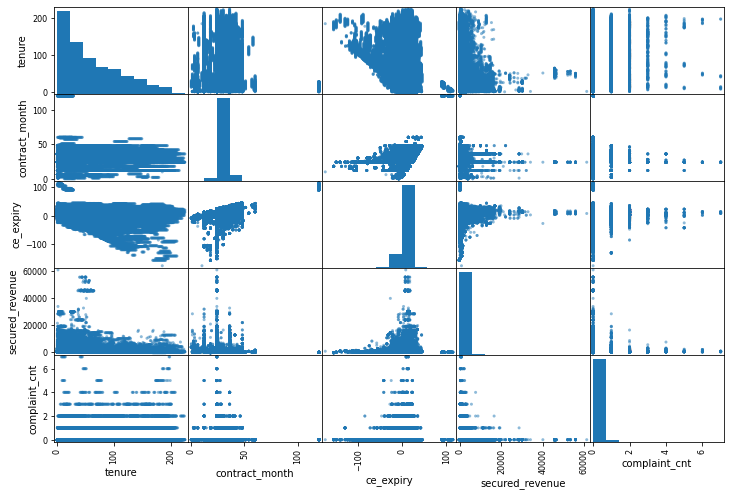

In [85]:
from pandas.plotting import scatter_matrix
attributes = dfshort.columns
scatter_matrix(dfshort[attributes], figsize=(12, 8))

In [88]:
dfshort.dtypes

tenure                  int64
contract_month        float64
ce_expiry             float64
secured_revenue       float64
bandwidth              object
complaint_cnt           int64
with_phone_service     object
churn                  object
current_mth_churn      object
dtype: object

In [86]:
dfshort=dfshort.drop(['effc_strt_date', 'effc_end_date'], axis = 1)

In [58]:
result=df.isnull()
print(result)

        image  newacct_no  ...  churn  current_mth_churn
0       False       False  ...  False              False
1       False       False  ...  False              False
2       False       False  ...  False              False
3       False       False  ...  False              False
4       False       False  ...  False              False
...       ...         ...  ...    ...                ...
510120  False       False  ...  False              False
510121  False       False  ...  False              False
510122  False       False  ...  False              False
510123  False       False  ...  False              False
510124  False       False  ...  False              False

[510125 rows x 19 columns]


In [59]:
dfshort = pd.get_dummies(dfshort)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML


In [63]:
dfshort_train, dfshort_test = train_test_split(dfshort, test_size=0.25)
count_vectorizer = CountVectorizer()
dfshort_count = count_vectorizer.fit_transform(dfshort_train)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dfshort_train = sc.fit_transform(dfshort_train)
dfshort_test = sc.transform(dfshort_test)

TypeError: ignored

In [96]:
ann = tf.keras.models.Sequential()

In [97]:
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))


In [98]:
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))


In [99]:
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))


In [100]:
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))

In [101]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [102]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(dfshort_train, dfshort_test, batch_size = 100, epochs = 30)

ValueError: ignored

In [ ]:
dfshort.columns

Index(['tenure', 'contract_month', 'ce_expiry', 'secured_revenue',
       'complaint_cnt', 'effc_strt_date_01.01.2011 00:00:00',
       'effc_strt_date_01.01.2014 00:00:00',
       'effc_strt_date_01.01.2015 00:00:00',
       'effc_strt_date_01.01.2016 00:00:00',
       'effc_strt_date_01.01.2017 00:00:00',
       ...
       'bandwidth_30M', 'bandwidth_500M (FTTO)', 'bandwidth_50M',
       'bandwidth_BELOW 10M', 'with_phone_service_N', 'with_phone_service_Y',
       'churn_N', 'churn_Y', 'current_mth_churn_N', 'current_mth_churn_Y'],
      dtype='object', length=4453)

In [ ]:
"dfshort['']

KeyError: ignored

In [ ]:
dfshort['bandwidth']=dfshort['bandwidth'].str.replace(" ","").str.replace("(FTTO)","").str.replace("\(","").str.replace("\)","").str.replace("M","").str.replace("BELOW","").astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def filter_ftto(data):
    if("FTTO" in data):
        return "Y"
    else:
        return "N"

In [ ]:
dfshort['Major']=dfshort['bandwidth'].apply(filter_ftto)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dfshort

,tenure,effc_strt_date,effc_end_date,contract_month,ce_expiry,secured_revenue,bandwidth,complaint_cnt,with_phone_service,churn,current_mth_churn,Major
0,202,06.03.2018 00:00:00,05.03.2021 00:00:00,36.0,13.0,178.0,100,0,N,N,N,N
1,35,01.03.2019 00:00:00,28.02.2021 00:00:00,24.0,13.0,1572.0,30,0,N,N,N,N
2,202,01.10.2019 00:00:00,30.09.2021 00:00:00,24.0,20.0,290.0,10,0,Y,N,N,N
3,72,07.11.2018 00:00:00,06.11.2020 00:00:00,24.0,9.0,218.0,100,0,Y,N,N,N
4,202,01.05.2017 00:00:00,30.04.2019 00:00:00,24.0,-9.0,430.0,100,0,N,Y,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
510120,0,31.12.2019 00:00:00,30.12.2021 00:00:00,24.0,23.0,0.0,1000,0,N,N,N,Y
510121,0,31.12.2019 00:00:00,30.12.2021 00:00:00,24.0,23.0,0.0,100,0,N,N,N,N
510122,70,12.03.2019 00:00:00,11.03.2021 00:00:00,24.0,13.0,0.0,10,0,N,N,N,N
510123,34,04.03.2019 00:00:00,03.03.2021 00:00:00,24.0,13.0,0.0,100,0,N,N,N,N


In [89]:
def filter_ftto(data):
    if("FTTO" in data):
        return "Y"
    else:
        return "N"

dfshort['Major']=dfshort['bandwidth'].apply(filter_ftto)

dfshort['bandwidth']=dfshort['bandwidth'].str.replace(" ","").str.replace("(FTTO)","").str.replace("\(","").str.replace("\)","").str.replace("M","").str.replace("BELOW","").astype(int)

dfshort['with_phone_service']= le.fit_transform(dfshort['with_phone_service']) 
dfshort['churn']= le.fit_transform(dfshort['churn']) 
dfshort['current_mth_churn']= le.fit_transform(dfshort['current_mth_churn']) 
dfshort['Major']= le.fit_transform(dfshort['Major']) 


X_data=dfshort[:377815]



X_train = X_data[['tenure', 'contract_month', 'ce_expiry', 'secured_revenue', 'bandwidth',
       'complaint_cnt', 'with_phone_service', 
       'Major']]

y_train = X_data[['churn']]

X_data_test=dfshort[377815:]


X_test = X_data_test[['tenure', 'contract_month', 'ce_expiry', 'secured_revenue', 'bandwidth',
       'complaint_cnt', 'with_phone_service', 
       'Major']]

y_test = X_data_test[['churn']]

NameError: ignored

In [92]:
dfshort = df[['tenure', 'effc_strt_date', 'effc_end_date', 'contract_month', 'ce_expiry', 'secured_revenue', 'bandwidth', 'complaint_cnt', 'with_phone_service', 'churn', 'current_mth_churn']]

In [93]:
dfshort=dfshort.drop(['effc_strt_date', 'effc_end_date'], axis = 1)

In [94]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 

def filter_ftto(data):
    if("FTTO" in data):
        return "Y"
    else:
        return "N"

dfshort['Major']=dfshort['bandwidth'].apply(filter_ftto)

dfshort['bandwidth']=dfshort['bandwidth'].str.replace(" ","").str.replace("(FTTO)","").str.replace("\(","").str.replace("\)","").str.replace("M","").str.replace("BELOW","").astype(int)

dfshort['with_phone_service']= le.fit_transform(dfshort['with_phone_service']) 
dfshort['churn']= le.fit_transform(dfshort['churn']) 
dfshort['current_mth_churn']= le.fit_transform(dfshort['current_mth_churn']) 
dfshort['Major']= le.fit_transform(dfshort['Major']) 


X_data=dfshort[:377815]



X_train = X_data[['tenure', 'contract_month', 'ce_expiry', 'secured_revenue', 'bandwidth',
       'complaint_cnt', 'with_phone_service', 
       'Major']]

y_train = X_data[['churn']]

X_data_test=dfshort[377815:]


X_test = X_data_test[['tenure', 'contract_month', 'ce_expiry', 'secured_revenue', 'bandwidth',
       'complaint_cnt', 'with_phone_service', 
       'Major']]

y_test = X_data_test[['churn']]

In [103]:
ann.fit(X_train, y_train, batch_size = 100, epochs = 30)

Epoch 1/30

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

3779/3779 [==============================] - 8s 2ms/step - loss: nan - accuracy: 0.8329
Epoch 2/30
3779/3779 [==============================] - 8s 2ms/step - loss: nan - accuracy: 0.8330
Epoch 3/30
3779/3779 [==============================] - 8s 2ms/step - loss: nan - accuracy: 0.8330
Epoch 4/30
3779/3779 [==============================] - 8s 2ms/step - loss: nan - accuracy: 0.8330
Epoch 5/30
3779/3779 [==============================] - 8s 2ms/step - loss: nan - accuracy: 0.8330
Epoch 6/30
37

In [110]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_t, y_t)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [107]:
X_train.shape

(377815, 8)

In [108]:
y_train.shape

(377815, 1)

In [109]:
X_t=X_train.iloc[:,:-1].values
y_t=y_train.iloc[:,-1].values

In [119]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_t)
cm = confusion_matrix(y_t, y_pred)
print(cm)
accuracy_score(X_t[:10], y_t)


[[309226   5478]
 [   694  62417]]


ValueError: ignored

In [116]:
print(y_train)

        churn
0           0
1           0
2           0
3           0
4           1
...       ...
377810      0
377811      0
377812      0
377813      0
377814      0

[377815 rows x 1 columns]
